<a href="https://colab.research.google.com/github/Rstam59/TaskDataRepoForStudents/blob/main/training_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class LinearRegression:
    def __init__(self):
        self.w = np.random.randn()

    def predict(self, x):
        return self.w * x

    def loss(self, pred, y):
        return (1 / len(x)) * np.sum((pred - y)**2)

    def gradient(self, pred, y, x):
        return (1 / len(x)) * np.sum((pred - y) * x)

    def fit(self, x, y, lr=0.0001, epochs=1000):
        for step in range(epochs):
            pred = self.predict(x)
            loss = self.loss(pred, y)
            grad = self.gradient(pred, y, x)
            self.w -= lr * grad

model = LinearRegression()
model.fit(x, y)

In [2]:
import numpy as np

class LinearRegression:
    def __init__(self, fit_intercept: bool = True, seed: int | None = None):
        self.fit_intercept = fit_intercept
        self.w = None  # (D,)
        self.b = 0.0
        if seed is not None:
            np.random.seed(seed)

    def _ensure_2d(self, X):
        X = np.asarray(X, dtype=float)
        if X.ndim == 1:
            X = X.reshape(-1, 1)  # (N,) -> (N,1)
        if X.ndim != 2:
            raise ValueError(f"X must be 1D or 2D. Got shape {X.shape}")
        return X

    def predict(self, X):
        X = self._ensure_2d(X)  # (N,D)
        if self.w is None:
            raise ValueError("Model is not initialized. Call fit() first.")
        yhat = X @ self.w  # (N,)
        if self.fit_intercept:
            yhat = yhat + self.b
        return yhat

    def loss(self, yhat, y):
        y = np.asarray(y, dtype=float).reshape(-1)
        yhat = np.asarray(yhat, dtype=float).reshape(-1)
        if yhat.shape != y.shape:
            raise ValueError(f"Shape mismatch: yhat {yhat.shape} vs y {y.shape}")
        # MSE
        return np.mean((yhat - y) ** 2)

    def gradients(self, X, yhat, y):
        X = self._ensure_2d(X)               # (N,D)
        y = np.asarray(y, dtype=float).reshape(-1)    # (N,)
        yhat = np.asarray(yhat, dtype=float).reshape(-1)
        N = X.shape[0]
        err = (yhat - y)                     # (N,)

        # d/dw of mean((Xw+b - y)^2) = (2/N) X^T err
        grad_w = (2.0 / N) * (X.T @ err)     # (D,)

        grad_b = 0.0
        if self.fit_intercept:
            grad_b = (2.0 / N) * np.sum(err)  # scalar

        return grad_w, grad_b

    def fit(self, X, y, lr=1e-3, epochs=1000, verbose=False):
        X = self._ensure_2d(X)
        y = np.asarray(y, dtype=float).reshape(-1)
        if X.shape[0] != y.shape[0]:
            raise ValueError(f"N mismatch: X has {X.shape[0]} rows, y has {y.shape[0]}")

        N, D = X.shape
        # Small init helps stability
        self.w = 0.01 * np.random.randn(D)
        self.b = 0.0

        for step in range(epochs):
            yhat = self.predict(X)
            L = self.loss(yhat, y)
            grad_w, grad_b = self.gradients(X, yhat, y)

            self.w -= lr * grad_w
            if self.fit_intercept:
                self.b -= lr * grad_b

            if verbose and (step % max(1, epochs // 10) == 0 or step == epochs - 1):
                print(f"step={step:5d} loss={L:.6f} ||w||={np.linalg.norm(self.w):.4f} b={self.b:.4f}")

        return self


In [55]:
import numpy as np

w = np.random.randn()
lr = 0.01
x = np.arange(2, 10, 2)
y = x * 10


In [56]:
for step in range(20):
    pred = w * x
    loss = np.sum((pred - y)**2) / len(x)
    grad = 2 * np.sum((pred - y) * x) / len(x)
    w = w - lr * grad
    print(w)

6.65397274891812
8.661589099567248
9.464635639826898
9.78585425593076
9.914341702372305
9.965736680948922
9.986294672379568
9.994517868951828
9.997807147580732
9.999122859032292
9.999649143612917
9.999859657445167
9.999943862978068
9.999977545191227
9.999991018076491
9.999996407230597
9.99999856289224
9.999999425156895
9.999999770062757
9.999999908025103


In [145]:
model.w

np.float64(1.9999999999999987)

In [ ]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)

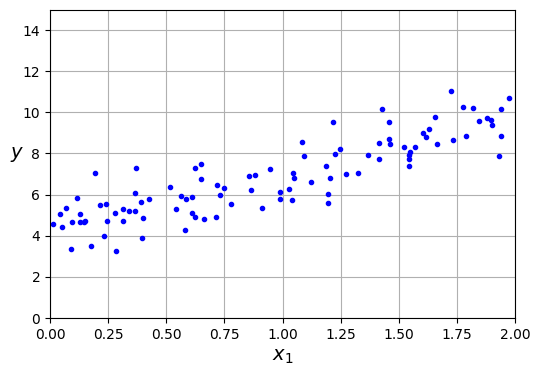

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid();

In [ ]:
import numpy as np

# Create two simple matrices
matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[5, 6], [7, 8]])

# Test matrix multiplication using @
result = matrix_a @ matrix_b
result1 = np.dot(matrix_a, matrix_b)

# Display the matrices and the result
print("Matrix A:")
print(matrix_a)
print("\nMatrix B:")
print(matrix_b)
print("\nResult of Matrix Multiplication (A @ B):")
print(result)
print("Result of Dot product:")
print(result1)
print('Element wise Multiplication')
print(matrix_a * matrix_b)

Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[5 6]
 [7 8]]

Result of Matrix Multiplication (A @ B):
[[19 22]
 [43 50]]
Result of Dot product:
[[19 22]
 [43 50]]
Element wise Multiplication
[[ 5 12]
 [21 32]]


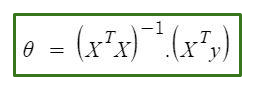

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

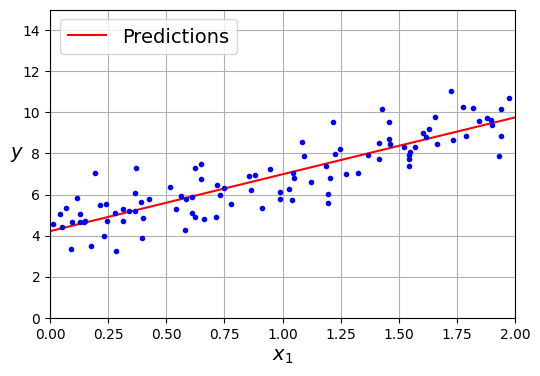

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, "b.")


plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_ , lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# Gradient Descent
Batch Gradient Descent

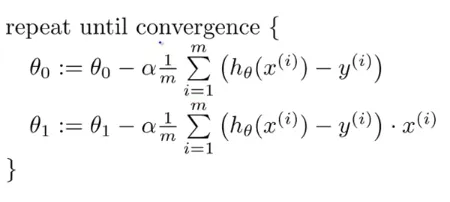

In [ ]:
theta = np.random.randn(2, 1)
theta

array([[0.01300189],
       [1.45353408]])

In [ ]:
np.random.seed(42)
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients


In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

#Viz 1

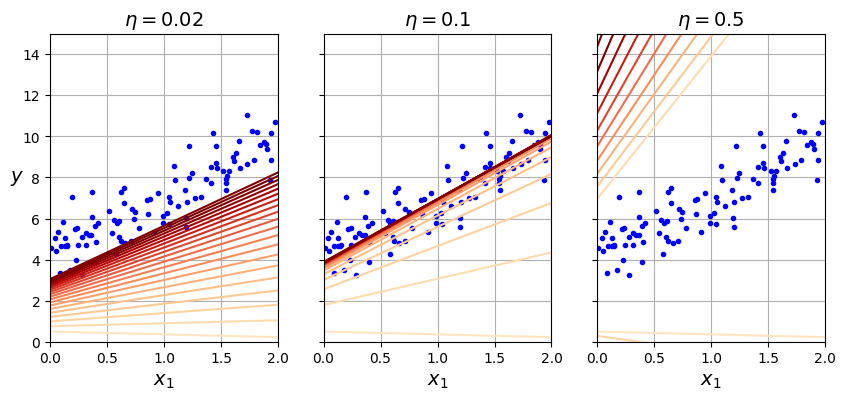

In [ ]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

# Stochastic Gradient Descent

In [ ]:
np.random.seed(42)
eta = 0.1
m = len(X_b)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T@(xi@theta-yi)
    theta = theta - eta * gradients

# gradients = 1 / m * 2 * X_b.T @ (X_b @ theta - y)
# theta = theta - eta * gradients

In [ ]:
X_b[random_index: random_index + 1]

array([[1.        , 1.46398788]])

In [ ]:
theta

array([[4.17686315],
       [2.85986577]])

In [ ]:
X_b[random_index]

array([1.        , 1.46398788])

In [ ]:
y[random_index : random_index + 1]

array([[8.48372443]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=0.00001, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, random_state=42, tol=1e-05)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21353251]), array([2.77191196]))

# Mini-batch gradient descent

In [ ]:
m

100

In [ ]:
np.random.permutation(m)

array([96, 70, 28, 72, 87, 91,  6, 42, 40, 94, 37, 67, 52, 33, 34, 57, 63,
       64, 82, 11, 12,  2, 25, 93,  5, 35, 48, 54, 62, 19, 53, 43, 80, 61,
       45, 75, 46,  8, 66, 92, 18, 20, 77,  0,  7, 10, 27, 50, 58, 23, 74,
       30, 76, 15,  9, 24, 79, 26, 95, 85, 32, 41, 71, 88, 16,  3, 55, 90,
       89, 81,  4, 60, 56, 65, 31, 68, 73, 83, 86, 14, 49, 17, 13,  1, 51,
       21, 36, 44, 84, 47, 99, 38, 29, 98, 22, 97, 78, 69, 59, 39])

In [ ]:
from math import ceil

n_epochs = 50
eta = 0.1
m = len(X_b)
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        theta = theta - eta * gradients

In [ ]:
theta

array([[4.22023943],
       [2.7704472 ]])

# Polynomial Regression

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

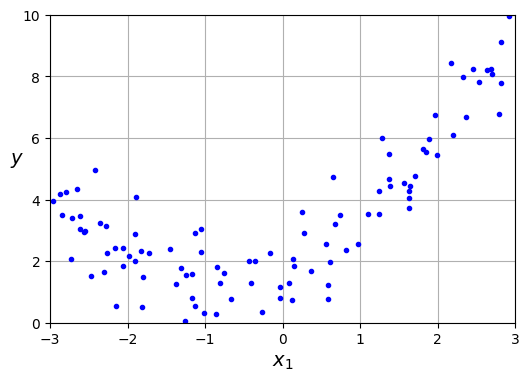

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
X_new = [[-3], [3]]

X_preds = lin_reg.predict(X_new)
X_preds

array([[1.03315352],
       [6.09487734]])

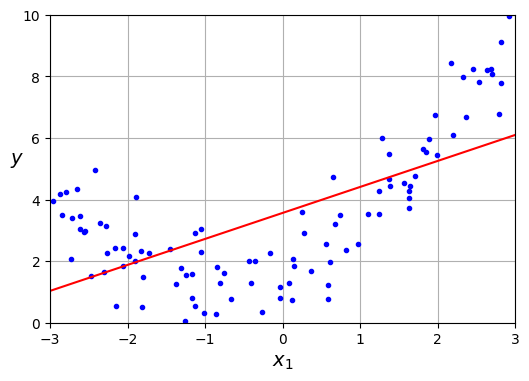

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, X_preds, 'r-')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [ ]:
X_poly.shape, X_poly.ndim

((100, 2), 2)

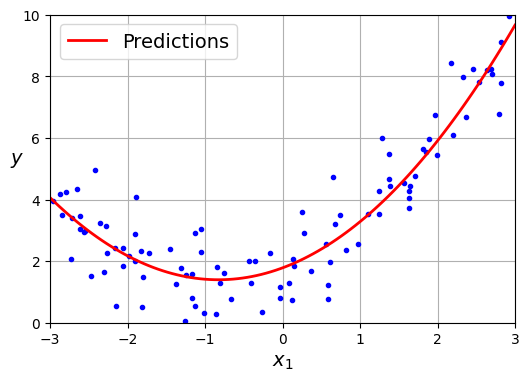

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

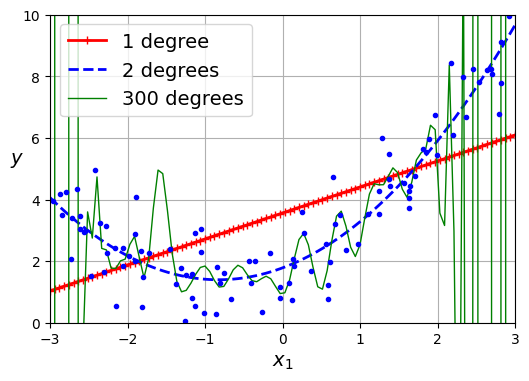

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

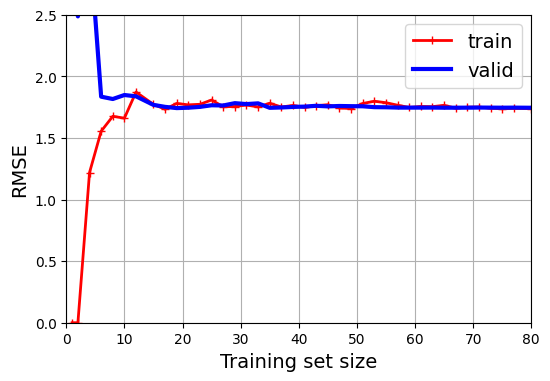

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])


plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

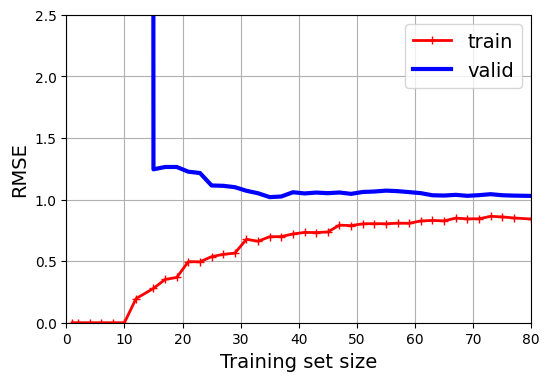

In [ ]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

In [ ]:
model.score(X_train, y_train) # 50
model.score(X_test, y_test)  # 20

# Regularized Linear Models
# Ridge Regression

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

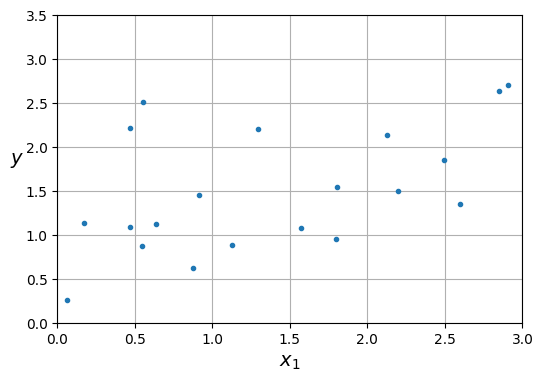

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge # l2

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

#Viz 2

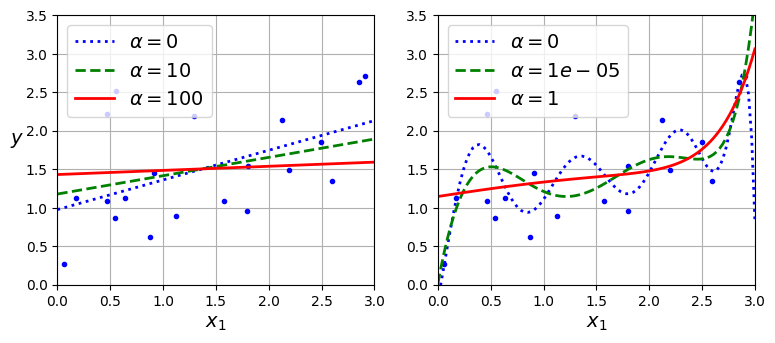

In [ ]:

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2",
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [ ]:
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55326019]])

In [ ]:
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [ ]:
ridge_reg.intercept_, ridge_reg.coef_

(array([0.97896386]), array([[0.38286422]]))

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso#l1

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

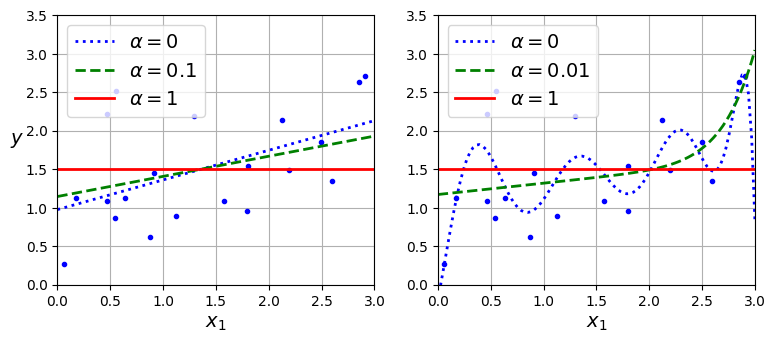

In [ ]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.show()

# Elastic Net

[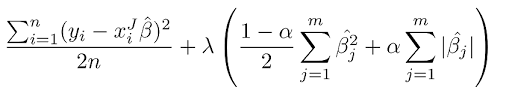

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

# Logistic Regression
# Estimating Probabilities

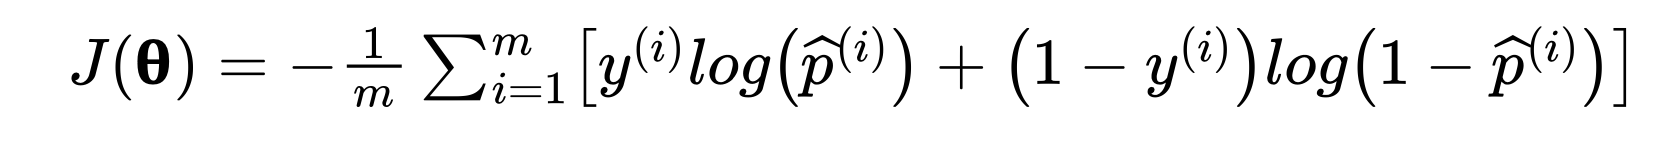

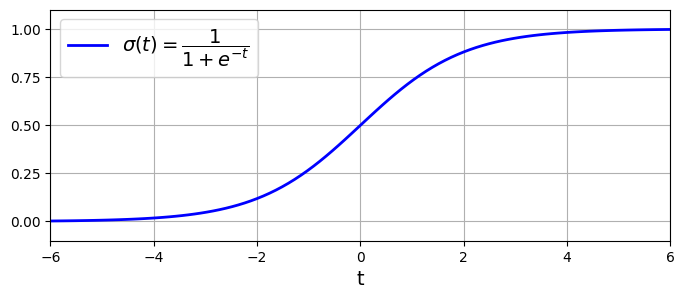

In [ ]:
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

# Decision Boundaries

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)
iris = load_iris(as_frame=True)
list(iris)

X = iris.data[["petal width (cm)"]].values
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
log_reg.score(X_test, y_test)

1.0

In [ ]:
X_train[:3]

array([[0.2],
       [0.1],
       [1.9]])

In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


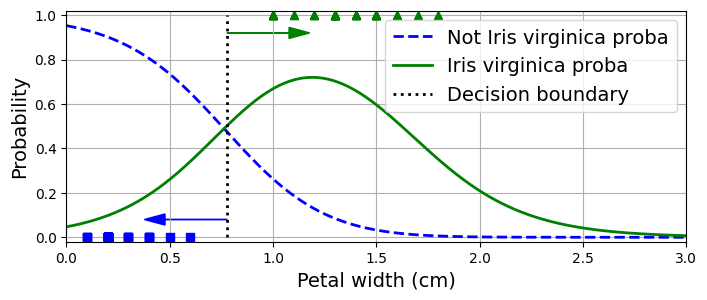

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")


plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")


plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="upper right")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

In [ ]:
y_proba[0][1]

In [ ]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0][0]
decision_boundary

In [ ]:
decision_boundary

In [ ]:
log_reg.predict([[1.7], [1.5]])

In [ ]:
w = 10
x = 2
y = 5

def f(w, x, y):
    return w * x - y


f(w, x, y)

15

In [ ]:
w = w - 0.1 * x
f(w, x, y)

14.600000000000001

In [ ]:
import numpy as np

def f(w, x, y):
    # Objective function: Mean Squared Error
    return 0.5 * (w * x - y) ** 2

def gradient(w, x, y):
    # Derivative of f(w) with respect to w
    return (w * x - y) * x


# Parameters
w = 10           # Initial weight
x = 2         # Input feature
y = 5          # Target output
alpha = 0.1     # Learning rate
losses = []


for i in range(20):
    grad = gradient(w, x, y)
    w = w - alpha * grad
    loss = f(w, x, y)
    losses.append(loss)
    print(f"step = {i} w = {w:.4f}, Loss = {loss:.4f}, Grad = {grad:.4f}")


step = 0 w = 7.0000, Loss = 40.5000, Grad = 30.0000
step = 1 w = 5.2000, Loss = 14.5800, Grad = 18.0000
step = 2 w = 4.1200, Loss = 5.2488, Grad = 10.8000
step = 3 w = 3.4720, Loss = 1.8896, Grad = 6.4800
step = 4 w = 3.0832, Loss = 0.6802, Grad = 3.8880
step = 5 w = 2.8499, Loss = 0.2449, Grad = 2.3328
step = 6 w = 2.7100, Loss = 0.0882, Grad = 1.3997
step = 7 w = 2.6260, Loss = 0.0317, Grad = 0.8398
step = 8 w = 2.5756, Loss = 0.0114, Grad = 0.5039
step = 9 w = 2.5453, Loss = 0.0041, Grad = 0.3023
step = 10 w = 2.5272, Loss = 0.0015, Grad = 0.1814
step = 11 w = 2.5163, Loss = 0.0005, Grad = 0.1088
step = 12 w = 2.5098, Loss = 0.0002, Grad = 0.0653
step = 13 w = 2.5059, Loss = 0.0001, Grad = 0.0392
step = 14 w = 2.5035, Loss = 0.0000, Grad = 0.0235
step = 15 w = 2.5021, Loss = 0.0000, Grad = 0.0141
step = 16 w = 2.5013, Loss = 0.0000, Grad = 0.0085
step = 17 w = 2.5008, Loss = 0.0000, Grad = 0.0051
step = 18 w = 2.5005, Loss = 0.0000, Grad = 0.0030
step = 19 w = 2.5003, Loss = 0.0000,

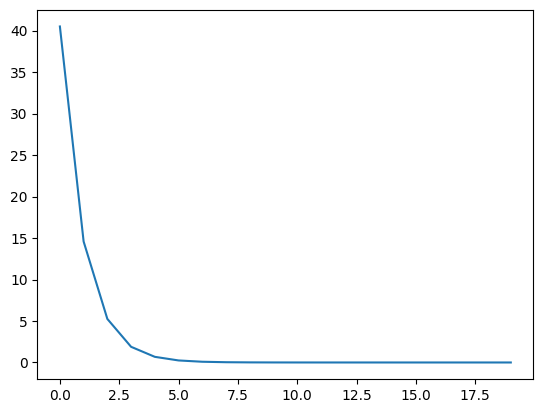

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses);

In [ ]:
import numpy as np

def f(w, x, y):
    # Objective function: Mean Squared Error
    return 0.5 * sum((w * x - y) ** 2) / len(x)


def gradient(w, x, y):
    return sum((w * x - y) * x) / len(x)

# Parameters
w = 10           # Initial weight
x = np.arange(0, 100, 2)           # Input feature
y = x * 2          # Target output
alpha = 0.0001     # Learning rate
losses = []


for i in range(100):
    grad = gradient(w, x, y)
    w = w - alpha * grad
    loss = f(w, x, y)
    losses.append(loss)
    print(f"step = {i} w = {w:.4f}, Loss = {loss:.4f}, Grad = {grad:.4f}")

step = 0 w = 7.4128, Loss = 47375.5190, Grad = 25872.0000
step = 1 w = 5.6623, Loss = 21687.9233, Grad = 17504.9952
step = 2 w = 4.4779, Loss = 9928.4615, Grad = 11843.8798
step = 3 w = 3.6766, Loss = 4545.1261, Grad = 8013.5690
step = 4 w = 3.1344, Loss = 2080.7022, Grad = 5421.9808
step = 5 w = 2.7675, Loss = 952.5196, Grad = 3668.5122
step = 6 w = 2.5193, Loss = 436.0516, Grad = 2482.1154
step = 7 w = 2.3514, Loss = 199.6190, Grad = 1679.3993
step = 8 w = 2.2377, Loss = 91.3831, Grad = 1136.2815
step = 9 w = 2.1608, Loss = 41.8340, Grad = 768.8081
step = 10 w = 2.1088, Loss = 19.1511, Grad = 520.1756
step = 11 w = 2.0736, Loss = 8.7671, Grad = 351.9508
step = 12 w = 2.0498, Loss = 4.0135, Grad = 238.1299
step = 13 w = 2.0337, Loss = 1.8373, Grad = 161.1187
step = 14 w = 2.0228, Loss = 0.8411, Grad = 109.0129
step = 15 w = 2.0154, Loss = 0.3850, Grad = 73.7581
step = 16 w = 2.0104, Loss = 0.1763, Grad = 49.9048
step = 17 w = 2.0071, Loss = 0.0807, Grad = 33.7656
step = 18 w = 2.0048,

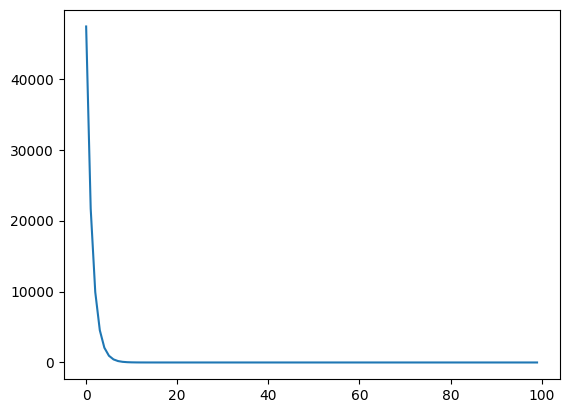

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses);

In [ ]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)

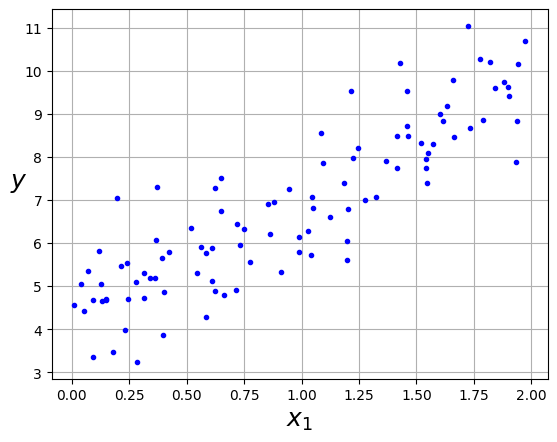

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [ ]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [ ]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)
theta_best

array([[4.21509616],
       [2.77011339]])

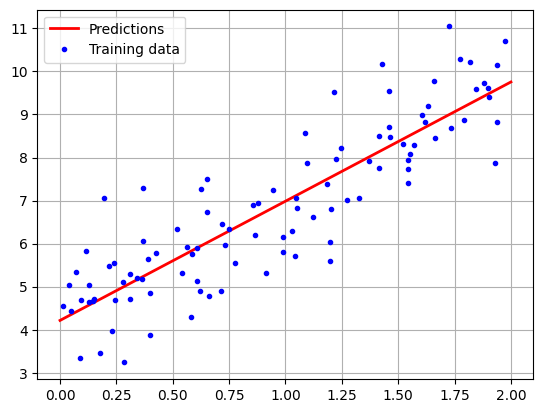

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.", label="Training data")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

#Batch Gradient Descent

In [ ]:
np.random.seed(42)
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)
theta = np.random.randn(2, 1)  # randomly initialized model parameters


for i in range(n_epochs):
    gradients = (1 / m) * (X_b.T @ (X_b @ theta - y))
    theta = theta - eta * gradients
print(theta)

[[4.21509613]
 [2.77011341]]


#Stochastic Gradient Descent

In [ ]:
n_epochs = 50
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = xi.T @ (xi @ theta - yi)
        theta = theta - eta * gradients
print(theta)

[[3.99874928]
 [2.4448152 ]]


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,
                       tol=1e-3, random_state=42,
                       n_iter_no_change = 20)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.96605419]), array([2.98845794]))

In [ ]:
y.ravel()

array([ 6.33428778,  9.40527849,  8.48372443,  5.60438199,  4.71643995,
        5.29307969,  5.82639572,  8.67878666,  6.79819647,  7.74667842,
        5.03890908, 10.14821022,  8.46489564,  5.7873021 ,  5.18802735,
        6.06907205,  5.12340036,  6.82087644,  6.19956196,  4.28385989,
        7.96723765,  5.09801844,  5.75798135,  5.96358393,  5.32104916,
        8.29041045,  4.85532818,  6.28312936,  7.3932017 ,  4.68275333,
        9.53145501,  5.19772255,  4.64785995,  9.61886731,  7.87502098,
        8.82387021,  5.88791282,  7.0492748 ,  7.91303719,  6.9424623 ,
        4.69751764,  5.80238342,  5.34915394, 10.20785545,  6.34371184,
        7.06574625,  7.27306077,  5.71855706,  7.86711877,  7.29958236,
        8.82697144,  8.08449921,  9.73664501,  8.86548845,  6.03673644,
        9.59980838,  3.4686513 ,  5.64948961,  3.3519395 ,  7.50191639,
        5.54881045,  5.30603267,  9.78594227,  4.90965564,  5.91306699,
        8.56331925,  3.23806212,  8.99781574,  4.70718666, 10.70

#Mini-batch Gradient Descent

#Polynomial Features

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

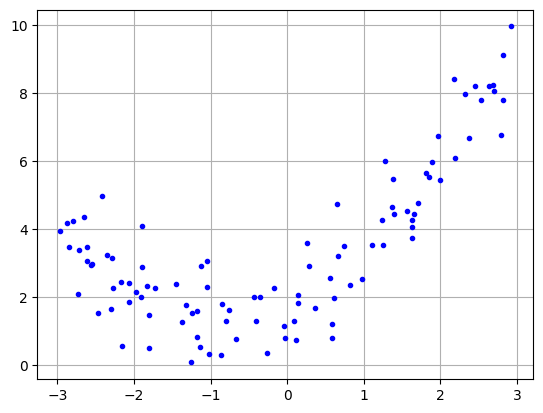

In [ ]:
plt.plot(X, y, 'b.')
plt.grid();

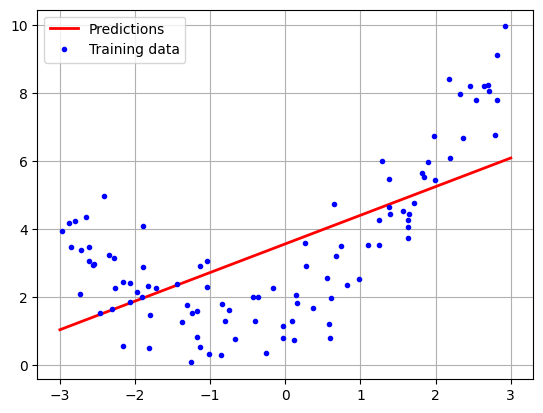

In [ ]:

lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_predicts = lin_reg.predict(X_new)

plt.plot(X_new, y_predicts, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.", label="Training data")
plt.legend()
plt.grid();

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree= 2, include_bias = False)
X_poly = poly.fit_transform(X)
X[0]

array([-0.75275929])

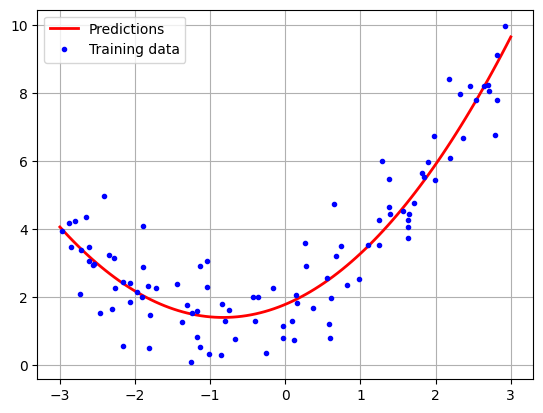

In [ ]:
X_new_poly = poly.fit_transform(X_new)


lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)


plt.plot(X_new, lin_reg.predict(X_new_poly), "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.", label="Training data")
plt.legend()
plt.grid();

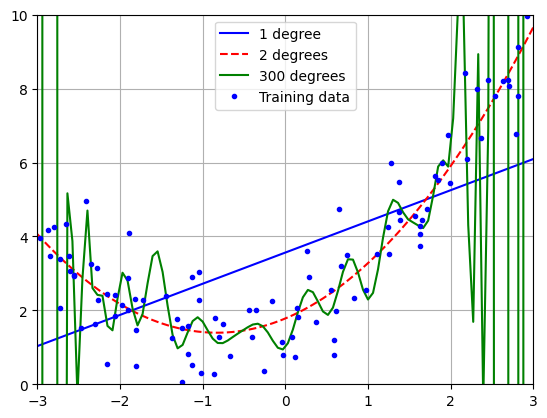

In [ ]:
from sklearn.preprocessing import StandardScaler


for degree, style in ((1, 'b-'), (2, 'r--'), (300, 'g-')):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    std_scaler = StandardScaler()
    polynomial_regression = make_pipeline(poly, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_predict = polynomial_regression.predict(X_new)
    label = f"{degree} degree" + ('s' if degree > 1 else '')
    plt.plot(X_new, y_predict, style, label=label)
    plt.axis([-3, 3, 0, 10])
plt.plot(X, y, "b.", label="Training data")
plt.legend()
plt.grid()

#Ridge regularization

In [ ]:
from sklearn.linear_model import Ridge#l2

ridge_reg = Ridge(alpha=1, random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82497007])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state = 42, penalty = 'l2')
sgd_reg.fit(X, y.ravel())

SGDRegressor(random_state=42)

#Lasso regularization

In [ ]:
from sklearn.linear_model import Lasso#l1

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

#Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.4, random_state=42)
elastic_net.fit(X, y)


ElasticNet(alpha=0.1, l1_ratio=0.4, random_state=42)

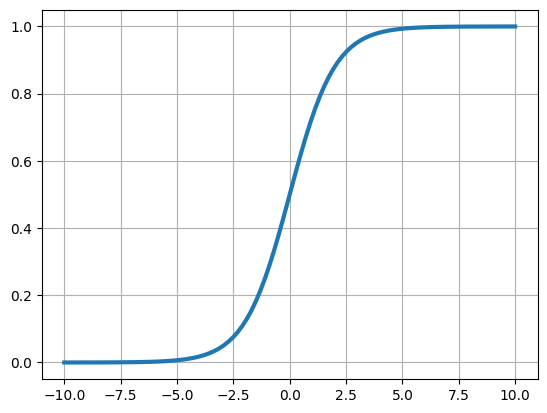

In [ ]:
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid, linewidth = 3)
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris(as_frame=True)

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9333333333333333

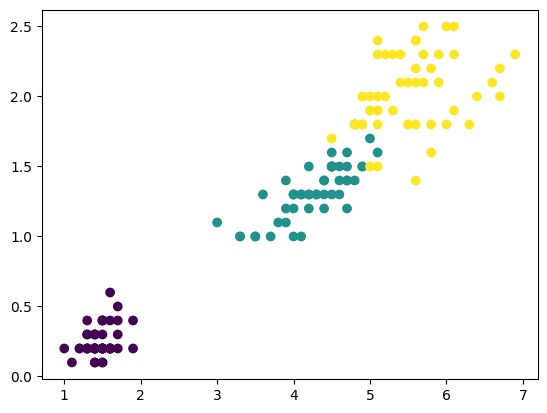

In [ ]:
plt.scatter(X["petal length (cm)"], X["petal width (cm)"], c= y)

In [ ]:
w = 10
x = 2
y = 5

def f(w, x, y):
    return w * x - y

f(w, x, y)

15

In [ ]:
w = w - 0.1 * x
f(w, x, y)

14.600000000000001

In [ ]:
w

9.8

In [ ]:
import numpy as np

def f(w, x, y):
    # Objective function: Mean Squared Error
    return 0.5 * (w * x - y) ** 2


def gradient(w, x, y):
    return (w * x - y) * x

# Parameters
w = 10           # Initial weight
x = 2        # Input feature
y = 5         # Target output
alpha = 0.1     # Learning rate
losses = []

for i in range(10):
    loss = f(w, x, y)
    grad = gradient(w, x, y)
    w = w - alpha * grad
    losses.append(loss)
    print(f"step: {i}, weight: {w:.4f}, loss: {loss:.4f}, grad: {grad:.4f}")



step: 0, weight: 7.0000, loss: 112.5000, grad: 30.0000
step: 1, weight: 5.2000, loss: 40.5000, grad: 18.0000
step: 2, weight: 4.1200, loss: 14.5800, grad: 10.8000
step: 3, weight: 3.4720, loss: 5.2488, grad: 6.4800
step: 4, weight: 3.0832, loss: 1.8896, grad: 3.8880
step: 5, weight: 2.8499, loss: 0.6802, grad: 2.3328
step: 6, weight: 2.7100, loss: 0.2449, grad: 1.3997
step: 7, weight: 2.6260, loss: 0.0882, grad: 0.8398
step: 8, weight: 2.5756, loss: 0.0317, grad: 0.5039
step: 9, weight: 2.5453, loss: 0.0114, grad: 0.3023


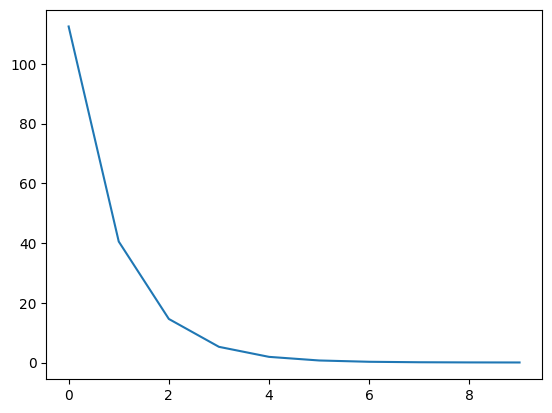

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses);

In [ ]:
X = np.arange(0, 100, 2)

In [ ]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)

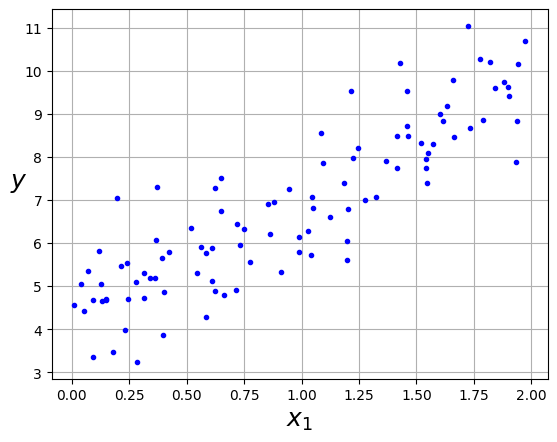

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [ ]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [ ]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)
theta_best

array([[4.21509616],
       [2.77011339]])

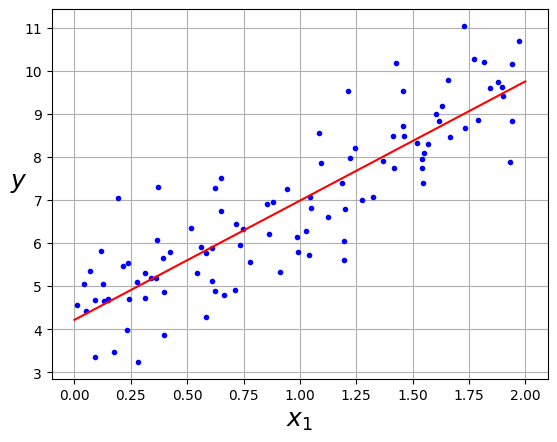

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

y_pred = X_new_b @ theta_best

plt.plot(X, y, 'b.')
plt.plot(X_new, y_pred, 'r-')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.coef_, lin_reg.intercept_

(array([[2.77011339]]), array([4.21509616]))

#Batch Gradient Descent

In [ ]:
np.random.seed(42)
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)
theta = np.random.randn(2, 1)  # randomly initialized model parameters


for i in range(n_epochs):
    gradients = (1 / m) * (X_b.T @ (X_b @ theta - y))
    theta = theta - eta * gradients
print(theta)

[[4.21509613]
 [2.77011341]]


#Stochastic Gradient Descent

In [ ]:
n_epochs = 50
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = xi.T @ (xi @ theta - yi)
        theta = theta - eta * gradients
print(theta)

[[3.99874928]
 [2.4448152 ]]


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 0.001, n_iter_no_change = 20)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.96848366]), array([2.98768065]))

#Mini Batch Gradient Descent

# Polynomial Features

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

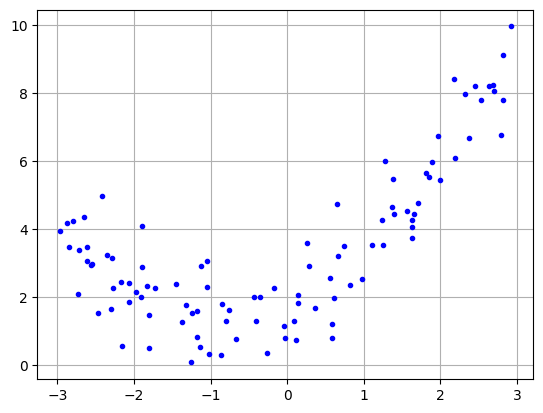

In [ ]:
plt.plot(X, y, 'b.')
plt.grid();

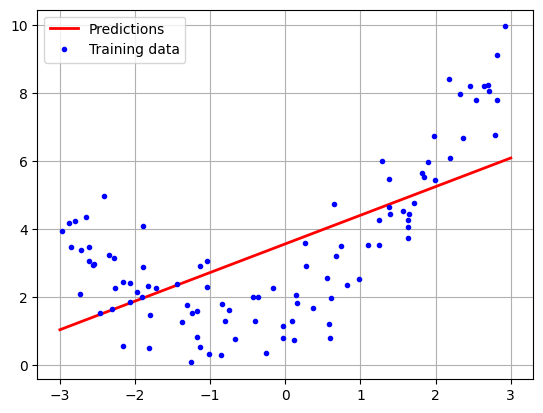

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_predicts = lin_reg.predict(X_new)

plt.plot(X_new, y_predicts, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.", label="Training data")
plt.legend()
plt.grid();

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

poly = PolynomialFeatures(degree= 2, include_bias = False)
X_poly = poly.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

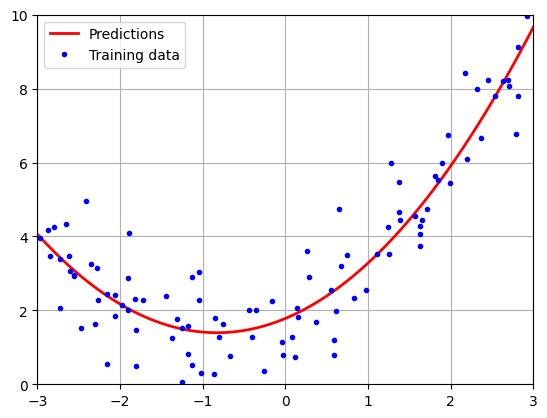

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
X_new_poly = poly.transform(X_new)
y_predict = lin_reg.predict(X_new_poly)

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.", label="Training data")
plt.axis([-3, 3, 0, 10])
plt.legend()
plt.grid();

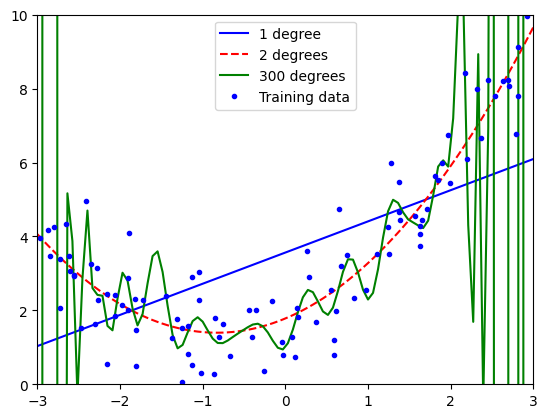

In [ ]:
for degree, style in ((1, 'b-'), (2, 'r--'), (300, 'g-')):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    std_scaler = StandardScaler()
    polynomial_regression = make_pipeline(poly, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_predict = polynomial_regression.predict(X_new)
    label = f"{degree} degree" + ('s' if degree > 1 else '')
    plt.plot(X_new, y_predict, style, label=label)
    plt.axis([-3, 3, 0, 10])
plt.plot(X, y, "b.", label="Training data")
plt.legend();

#Ridge

In [ ]:
from sklearn.linear_model import Ridge#l2

ridge_reg = Ridge(alpha=1, random_state=42)
ridge_reg.fit(X, y)

Ridge(alpha=1, random_state=42)

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state = 42, penalty = 'l2')

#Lasso

In [ ]:
from sklearn.linear_model import Lasso#l1

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

#ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.4, random_state=42)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1, l1_ratio=0.4, random_state=42)

#Logistic Regression

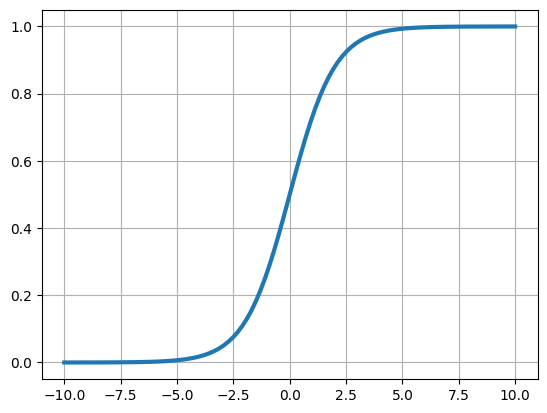

In [ ]:
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid, linewidth = 3)
plt.grid()
plt.show();

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris(as_frame=True)

X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

1.0

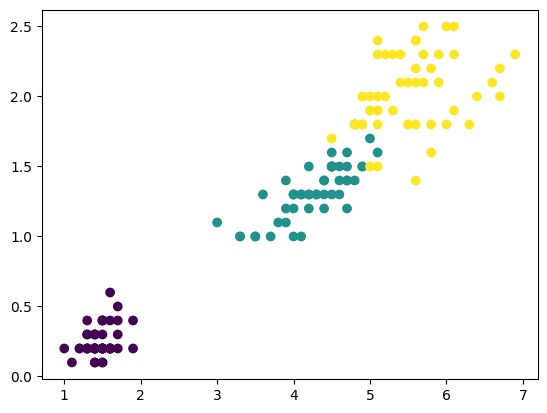

In [ ]:
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c = y);

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
